<a href="https://colab.research.google.com/github/Satyajit99p/online-auction-fraud-detection/blob/master/Copy_of_Copy_of_Trial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.getcwd()

'/content'

In [3]:
os.chdir('/content/drive/My Drive/online auction fraud detection')

PREPROCESSING


In [4]:
import pandas as pd
import numpy as np
import seaborn as sb

In [5]:
data=pd.read_csv('Online Auction_Shill Bidding Dataset.csv')

In [6]:
data.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [8]:
data.head(10)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
5,8,900,i***e,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,7,0
6,10,900,m***p,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,7,0
7,12,900,k***a,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1
8,13,2370,g***r,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,7,1
9,27,600,e***t,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,7,1


In [9]:
data.shape

(6321, 13)

In [10]:
df=data.iloc[:,3:]
type(df)

pandas.core.frame.DataFrame

In [11]:
df.shape

(6321, 10)

In [12]:
df.head(10)

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
5,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,7,0
6,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,7,0
7,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1
8,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,7,1
9,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,7,1


In [13]:
# Data is preprocessed
# As there is a classification issue addressed, outliers are not present.
# There is no missing values and all rows contain polished data.
# 'Record_ID','Auction_ID','Bidder_ID' are non-influential in determing the desired classification.so they are omitted.

MODEL CREATION AND TRAINING

In [14]:
import tensorflow as tf
import keras
from keras.callbacks import *

In [15]:
features=df.iloc[:,:9]
labels=df.iloc[:,-1]

print(features.shape)
print(labels.shape)

(6321, 9)
(6321,)


In [16]:
from sklearn.model_selection import train_test_split

x_train_full,x_test,y_train_full,y_test=train_test_split(features,labels,random_state=9)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,random_state=9)

In [17]:
x_train.shape

(3555, 9)

In [18]:
y_train.shape

(3555,)

In [19]:
x_test.shape

(1581, 9)

In [20]:
y_test.shape

(1581,)

In [21]:
x_valid.shape

(1185, 9)

In [22]:
y_valid.shape

(1185,)

In [23]:
# there is consistent division of the dataset into the training testing and validation biparts
# 3555+1581+1185=6321

In [24]:
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
from sklearn.metrics import confusion_matrix

**SEQUENTIAL MODEL**

In [53]:
model=keras.models.Sequential([
                               keras.layers.Dense(60,kernel_initializer='uniform',activation='relu',input_shape=[9]),
                               keras.layers.Dense(60,kernel_initializer='uniform',activation='relu'),
                               keras.layers.Dense(1,activation='sigmoid')
])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 60)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 61        
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [56]:
checkpoint=keras.callbacks.ModelCheckpoint('best-Model.h5',save_best_only=True)
early=keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)

In [57]:
model.fit(x_train,y_train,epochs=200,batch_size=10,validation_data=(x_valid,y_valid),callbacks=[checkpoint,early])

Epoch 1/200
356/356 [==============================] - 2s 4ms/step - loss: 0.1124 - accuracy: 0.9002 - val_loss: 0.0164 - val_accuracy: 0.9705
Epoch 2/200
356/356 [==============================] - 1s 3ms/step - loss: 0.0168 - accuracy: 0.9774 - val_loss: 0.0148 - val_accuracy: 0.9797
Epoch 3/200
356/356 [==============================] - 1s 3ms/step - loss: 0.0175 - accuracy: 0.9760 - val_loss: 0.0136 - val_accuracy: 0.9797
Epoch 4/200
356/356 [==============================] - 1s 3ms/step - loss: 0.0148 - accuracy: 0.9772 - val_loss: 0.0174 - val_accuracy: 0.9772
Epoch 5/200
356/356 [==============================] - 1s 3ms/step - loss: 0.0156 - accuracy: 0.9783 - val_loss: 0.0136 - val_accuracy: 0.9823
Epoch 6/200
356/356 [==============================] - 1s 3ms/step - loss: 0.0105 - accuracy: 0.9868 - val_loss: 0.0111 - val_accuracy: 0.9865
Epoch 7/200
356/356 [==============================] - 1s 3ms/step - loss: 0.0096 - accuracy: 0.9898 - val_loss: 0.0111 - val_accuracy: 0.9873

In [58]:
trial=keras.models.load_model('best-Model.h5')

In [59]:
test=model.evaluate(x_test,y_test)

50/50 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9943


In [60]:
y_pred=model.predict(x_test)

In [61]:
print(type(y_test))
print(type(y_pred))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [62]:
y_test.values

array([0, 1, 0, ..., 0, 0, 0])

In [63]:
y_pred

array([[5.2989204e-08],
       [9.9626225e-01],
       [5.0711859e-04],
       ...,
       [2.6505033e-06],
       [6.0068459e-08],
       [2.9246405e-07]], dtype=float32)

In [ ]:
y_pred=np.where(y_pred>=0.5,1,0)

In [ ]:
y_pred=y_pred.flatten()

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1397,    4],
       [   2,  178]])

In [52]:
y_probab=model.predict_proba(x_test)
y_probab

AttributeError: ignored

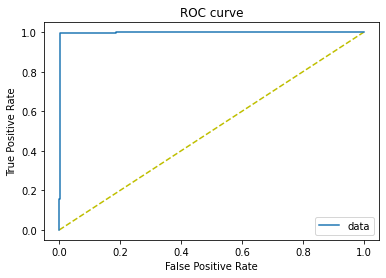

In [51]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred=y_pred.ravel()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(1)
plt.plot([0,1],[0,1],'y--')
plt.plot(fpr,tpr,label="data")
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [64]:
score = metrics.roc_auc_score(y_test,y_pred)
score

0.9975097152827346

In [ ]:
thresholds

array([1.9999982e+00, 9.9999821e-01, 9.9999595e-01, 9.9999547e-01,
       9.9999464e-01, 9.9999452e-01, 9.9999440e-01, 9.9999416e-01,
       9.9998891e-01, 9.9998605e-01, 9.9945205e-01, 9.9829727e-01,
       9.9787700e-01, 9.9457729e-01, 9.9443406e-01, 8.3619773e-01,
       7.4697077e-01, 3.8423389e-01, 2.8219356e-04, 2.8054565e-04,
       6.4715898e-08], dtype=float32)

In [ ]:
keras.backend.clear_session()

In [ ]:
del model

FUNCTIONAL MODEL

In [26]:
input1=keras.layers.Input(shape=x_train.shape[1:])
hidden1=keras.layers.Dense(60,kernel_initializer='uniform',activation='relu')(input1)
hidden2=keras.layers.Dense(60,kernel_initializer='uniform',activation='relu')(hidden1)
concat=keras.layers.concatenate([input1,hidden2])
output=keras.layers.Dense(1,activation='sigmoid')(concat)
model=keras.models.Model(inputs=[input1],outputs=[output])

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 60)           600         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 60)           3660        dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 69)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [28]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
checkpoint=keras.callbacks.ModelCheckpoint('best-Model.h5',save_best_only=True)
early=keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)

In [30]:
model.fit(x_train,y_train,epochs=200,batch_size=10,validation_data=(x_valid,y_valid),callbacks=[checkpoint,early])

Epoch 1/200
356/356 [==============================] - 18s 4ms/step - loss: 0.0890 - accuracy: 0.9158 - val_loss: 0.0167 - val_accuracy: 0.9662
Epoch 2/200
356/356 [==============================] - 1s 3ms/step - loss: 0.0158 - accuracy: 0.9769 - val_loss: 0.0153 - val_accuracy: 0.9797
Epoch 3/200
356/356 [==============================] - 1s 3ms/step - loss: 0.0180 - accuracy: 0.9761 - val_loss: 0.0139 - val_accuracy: 0.9789
Epoch 4/200
356/356 [==============================] - 1s 3ms/step - loss: 0.0146 - accuracy: 0.9772 - val_loss: 0.0173 - val_accuracy: 0.9738
Epoch 5/200
356/356 [==============================] - 1s 3ms/step - loss: 0.0155 - accuracy: 0.9775 - val_loss: 0.0156 - val_accuracy: 0.9747
Epoch 6/200
356/356 [==============================] - 1s 3ms/step - loss: 0.0123 - accuracy: 0.9843 - val_loss: 0.0148 - val_accuracy: 0.9755
Epoch 7/200
356/356 [==============================] - 1s 3ms/step - loss: 0.0145 - accuracy: 0.9781 - val_loss: 0.0170 - val_accuracy: 0.972

In [31]:
trial=keras.models.load_model('best-Model.h5')

In [32]:
test=model.evaluate(x_test,y_test)

50/50 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9962


In [43]:
y_pred=model.predict(x_test).ravel()

In [35]:
print(type(y_pred))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [36]:
y_pred

array([5.2344939e-14, 9.9866128e-01, 1.2405225e-05, ..., 2.5538222e-12,
       2.2774325e-13, 8.1943716e-14], dtype=float32)

In [37]:
y_test.values

array([0, 1, 0, ..., 0, 0, 0])

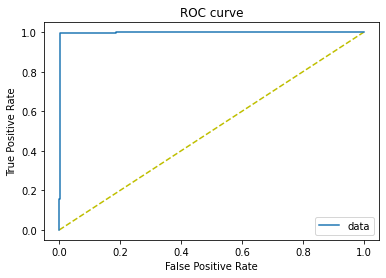

In [45]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


y_pred=y_pred.ravel()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(1)
plt.plot([0,1],[0,1],'y--')
plt.plot(fpr,tpr,label="data")
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score

score= metrics.roc_auc_score(y_test, y_pred)
score

0.9972836862558491

In [39]:
y_pred=np.where(y_pred>=0.5,1,0)
y_pred=y_pred.flatten()
confusion_matrix(y_test,y_pred)

array([[1397,    4],
       [   2,  178]])

In [41]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00142755,
       0.00142755, 0.00214133, 0.00214133, 0.0028551 , 0.0028551 ,
       0.18772305, 0.18772305, 1.        ])

In [42]:
tpr

array([0.        , 0.00555556, 0.02222222, 0.04444444, 0.05555556,
       0.06666667, 0.09444444, 0.10555556, 0.15555556, 0.15555556,
       0.35555556, 0.35555556, 0.96666667, 0.96666667, 0.99444444,
       0.99444444, 1.        , 1.        ])

In [ ]:
keras.backend.clear_session()

In [ ]:
del model